# Generic Imports

In this section of the file we import the various libraries and files that we are going to use in the rest of the file

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

from sklearn.metrics import adjusted_mutual_info_score
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

import os

In [75]:
os.chdir("C:/Users/Michele/OneDrive/Documents/GitHub/AI_Lab/AI-Lab/processed_data")

In [76]:
df_HCC_SS_tr = pd.read_csv("HCC1806_SmartS_Filtered_Standardized-Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_SS_tr = df_HCC_SS_tr.iloc[:-1,:].T
df_HCC_SS_tr.head()

,"""FTL""","""ACTB""","""FTH1""","""BEST1""","""LDHA""","""HSPA5""","""KRT19""","""GAPDH""","""KRT17""","""CD44""",...,"""CSNK1E""","""SPOUT1""","""WASHC4""","""SPCS3""","""EMC8""","""ITGB8""","""CRELD1""","""SMARCC2""","""PTBP3""","""AIP"""
"""output.STAR.PCRPlate3F1_Hypoxia_S163_Aligned.sortedByCoord.out.bam""",24247.0,27836.0,13205.0,11563.0,39786.0,18644.0,14701.0,22408.0,51.0,19913.0,...,284.0,177.0,320.0,350.0,115.0,396.0,702.0,309.0,341.0,19.0
"""output.STAR.PCRPlate4G10_Normoxia_S209_Aligned.sortedByCoord.out.bam""",24022.0,26927.0,11600.0,10218.0,11749.0,6390.0,4812.0,16435.0,0.0,8986.0,...,166.0,10.0,44.0,223.0,168.0,52.0,87.0,382.0,259.0,293.0
"""output.STAR.PCRPlate4F1_Hypoxia_S224_Aligned.sortedByCoord.out.bam""",16909.0,20245.0,3681.0,3251.0,20686.0,12152.0,4135.0,12571.0,0.0,15899.0,...,114.0,56.0,270.0,255.0,198.0,73.0,59.0,241.0,185.0,129.0
"""output.STAR.PCRPlate3E2_Hypoxia_S65_Aligned.sortedByCoord.out.bam""",20682.0,24854.0,4187.0,3649.0,24663.0,20489.0,4653.0,18378.0,0.0,23119.0,...,180.0,76.0,191.0,493.0,110.0,89.0,259.0,462.0,97.0,241.0
"""output.STAR.PCRPlate2B8_Normoxia_S152_Aligned.sortedByCoord.out.bam""",22904.0,33450.0,13361.0,11685.0,18181.0,10407.0,5642.0,15562.0,0.0,11230.0,...,247.0,97.0,144.0,201.0,226.0,35.0,50.0,206.0,308.0,58.0


In [77]:
df_HCC_SS_ts = pd.read_csv("HCC1806_SmartS_Filtered_Standardized-Normalised_3000_Data_test.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_SS_ts = df_HCC_SS_ts.iloc[:-1,:].T
df_HCC_SS_ts.head()

,"""FTL""","""ACTB""","""FTH1""","""BEST1""","""LDHA""","""HSPA5""","""KRT19""","""GAPDH""","""KRT17""","""CD44""",...,"""CSNK1E""","""SPOUT1""","""WASHC4""","""SPCS3""","""EMC8""","""ITGB8""","""CRELD1""","""SMARCC2""","""PTBP3""","""AIP"""
"""output.STAR.PCRPlate1E6_Hypoxia_S14_Aligned.sortedByCoord.out.bam""",7618.0,30831.0,4445.0,3860.0,13528.0,7095.0,11457.0,18540.0,0.0,5932.0,...,121.0,106.0,29.0,51.0,140.0,12.0,136.0,53.0,109.0,173.0
"""output.STAR.PCRPlate4F7_Normoxia_S203_Aligned.sortedByCoord.out.bam""",2611.0,11612.0,1571.0,1385.0,2293.0,4378.0,2445.0,3896.0,69.0,4970.0,...,79.0,70.0,42.0,43.0,71.0,34.0,39.0,113.0,19.0,32.0
"""output.STAR.PCRPlate3F10_Normoxia_S190_Aligned.sortedByCoord.out.bam""",18195.0,26079.0,5602.0,4947.0,8113.0,11262.0,5540.0,11152.0,30.0,10520.0,...,158.0,771.0,180.0,221.0,283.0,53.0,67.0,184.0,252.0,213.0
"""output.STAR.PCRPlate3H10_Normoxia_S192_Aligned.sortedByCoord.out.bam""",7588.0,10358.0,2287.0,1973.0,2059.0,2548.0,1016.0,4105.0,104.0,5160.0,...,73.0,70.0,54.0,49.0,139.0,70.0,41.0,196.0,27.0,76.0
"""output.STAR.PCRPlate3B7_Normoxia_S183_Aligned.sortedByCoord.out.bam""",46775.0,33796.0,10286.0,8952.0,8608.0,8907.0,6752.0,16419.0,0.0,38539.0,...,274.0,137.0,199.0,419.0,91.0,53.0,413.0,337.0,231.0,40.0


In [78]:
df_MCF_SS_tr = pd.read_csv("MCF7_SmartS_Filtered_Standardized-Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_SS_tr = df_MCF_SS_tr.iloc[:-1,:].T
df_MCF_SS_tr.head()

,"""GAPDH""","""ACTG1""","""ALDOA""","""KRT8""","""ACTB""","""KRT18""","""CYP1B1""","""KRT19""","""CYP1A1""","""FTH1""",...,"""COPS7A""","""RRBP1""","""CBFA2T3""","""HMGXB3""","""ELOVL2""","""INTS2""","""RPL27""","""MAP2K2""","""RUNDC1""","""WIPI2"""
"""output.STAR.3_G5_Norm_S305_Aligned.sortedByCoord.out.bam""",6570.0,4090.0,2883.0,33346.0,18381.0,27029.0,362.0,6075.0,0.0,3810.0,...,45.0,57.0,40.0,141.0,244.0,226.0,216.0,175.0,21.0,70.0
"""output.STAR.2_H4_Norm_S346_Aligned.sortedByCoord.out.bam""",5282.0,2083.0,2244.0,26192.0,10005.0,22030.0,218.0,5149.0,0.0,1911.0,...,57.0,10.0,48.0,4.0,78.0,132.0,114.0,196.0,29.0,95.0
"""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""",10979.0,7997.0,15055.0,23943.0,25237.0,29534.0,45.0,10125.0,0.0,4984.0,...,115.0,45.0,335.0,3.0,91.0,82.0,118.0,315.0,167.0,187.0
"""output.STAR.2_B2_Norm_S56_Aligned.sortedByCoord.out.bam""",6773.0,7821.0,5049.0,16163.0,24051.0,15379.0,176.0,9319.0,0.0,2612.0,...,123.0,20.0,5.0,20.0,25.0,51.0,172.0,197.0,28.0,40.0
"""output.STAR.2_D1_Norm_S151_Aligned.sortedByCoord.out.bam""",15348.0,8636.0,13045.0,46261.0,41401.0,47834.0,638.0,18306.0,0.0,3192.0,...,125.0,71.0,310.0,32.0,17.0,155.0,196.0,145.0,23.0,114.0


In [79]:
df_MCF_SS_ts = pd.read_csv("MCF7_SmartS_Filtered_Standardized-Normalised_3000_Data_test.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_SS_ts = df_MCF_SS_ts.iloc[:-1,:].T
df_MCF_SS_ts.head()

,"""GAPDH""","""ACTG1""","""ALDOA""","""KRT8""","""ACTB""","""KRT18""","""CYP1B1""","""KRT19""","""CYP1A1""","""FTH1""",...,"""COPS7A""","""RRBP1""","""CBFA2T3""","""HMGXB3""","""ELOVL2""","""INTS2""","""RPL27""","""MAP2K2""","""RUNDC1""","""WIPI2"""
"""output.STAR.4_E10_Hypo_S238_Aligned.sortedByCoord.out.bam""",49795.0,9599.0,16137.0,22530.0,4455.0,23317.0,29195.0,29137.0,2162.0,6741.0,...,23.0,8.0,38.0,6.0,13.0,21.0,119.0,197.0,240.0,18.0
"""output.STAR.4_E5_Norm_S215_Aligned.sortedByCoord.out.bam""",3344.0,2751.0,1991.0,18653.0,11097.0,16373.0,84.0,5067.0,0.0,1348.0,...,57.0,34.0,25.0,78.0,76.0,57.0,131.0,95.0,15.0,56.0
"""output.STAR.4_B3_Norm_S69_Aligned.sortedByCoord.out.bam""",8791.0,9624.0,6473.0,35477.0,26802.0,27792.0,347.0,8905.0,0.0,3178.0,...,88.0,13.0,54.0,45.0,267.0,185.0,168.0,145.0,115.0,180.0
"""output.STAR.4_D3_Norm_S165_Aligned.sortedByCoord.out.bam""",4085.0,3368.0,1662.0,15677.0,12674.0,15745.0,0.0,4707.0,0.0,1623.0,...,29.0,33.0,6.0,23.0,20.0,34.0,125.0,78.0,17.0,54.0
"""output.STAR.1_D11_Hypo_S173_Aligned.sortedByCoord.out.bam""",30410.0,28187.0,27002.0,23270.0,37455.0,19409.0,5471.0,31151.0,136.0,5125.0,...,58.0,85.0,0.0,73.0,0.0,6.0,70.0,140.0,24.0,107.0


The following function is a mapper that associates to every cell in the datasets a new name, more readable for our code and more useful for getting the labels from the Cell Names.   
Secondly, we apply the same code to each dataset in order to get a list containing the labels (0-Hypoxia, 1-Normoxia) which we can later use in the plots for the colors of the various points or for comparing the results of our models with the theoretical classifications.

In [80]:
def Renamer(name):
    clas = name.split("_")[-3]
    cell = name.split("_")[-2]
    if len(clas)>4:
        clas = clas[:4]
    return clas+"_"+cell

In [81]:
df_HCC_SS_tr.rename(mapper=Renamer, axis = "index", inplace=True)
y_HCC_SS_tr = [int(i.split("_")[0]=="Norm") for i in df_HCC_SS_tr.index]
print(y_HCC_SS_tr)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]


In [82]:
df_HCC_SS_ts.rename(mapper=Renamer, axis = "index", inplace=True)
y_HCC_SS_ts = [int(i.split("_")[0]=="Norm") for i in df_HCC_SS_ts.index]
print(y_HCC_SS_ts)

[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [83]:
df_MCF_SS_tr.rename(mapper=Renamer, axis = "index", inplace=True)
y_MCF_SS_tr = [int(i.split("_")[0]=="Norm") for i in df_MCF_SS_tr.index]
print(y_MCF_SS_tr)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]


In [84]:
df_MCF_SS_ts.rename(mapper=Renamer, axis = "index", inplace=True)
y_MCF_SS_ts = [int(i.split("_")[0]=="Norm") for i in df_MCF_SS_ts.index]
print(y_MCF_SS_ts)

[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]


---
---
---
# Dimensionality Reduction

---
## Blackbox Functions

We wrote a set of functions whose purpose is not only to apply said dimensionality reduction, but also to give us the "best choice" of dimension of the target space, in order to preserve as much information as possible.   
Moreover, the code also plots the explained variance per number of dimensions, a plot useful for a better understanding of the various models.
In general, these functions take mainly 3 variables as input:
- X, that is our `Observations Dataset`, which in our case will be the dataframe containing the gene expression of each cell.
- Y, that is the `Labels List`, which we use to assign colors to the points in our visualization scatterplot.
- model, that is the type of `Dimensionality Reduction` we chose to apply to our set X in the visualization process.

In [85]:
#Gives the 2-D Plot based on the model's Dimensionality Reduction
def Plot(X, Y, model):
    model.set_params(n_components=2)
    m = model.fit_transform(X)
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    visual = pd.DataFrame(m, columns=["PC1","PC2"])
    plt.scatter(visual["PC1"], visual["PC2"], c=condc, s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Conditions")
    plt.show()

In [86]:
def Var_Predicted(X, model,n):
    pred_var_expl = []
    model.set_params(n_components=n)
    matrix = model.fit_transform(X)
    for i in range(1,n+1):
        matrix_current = pd.DataFrame(matrix[:,:i])
        pls = PLSRegression(n_components=i)
        pls.fit(matrix_current, X)                                              
        y = pls.predict(matrix_current)
        pred_var_expl.append(r2_score(X,y,multioutput="variance_weighted"))     
    return pred_var_expl

In [87]:
#Function for 95% explained variance definition
def numb_comp(X, model, eps = 0.95, n=100):
    vars = Var_Predicted(X,model,n)
    for i in range(len(vars)):
        if vars[i]>=0.95:
            return vars, i
    return vars, n

In [88]:
#Plots the Explained Variance based on the Number of Components
def Var_Plot(X, model, eps=0.95, n=100):
    variances, C = numb_comp(X, model, eps)
    print("The Opitmal Number of Dimensions for PCA is", C)
    plt.plot(range(1,n+1), variances, '-', linewidth=2)
    plt.plot([C, C], [0, eps], "k:")
    plt.plot([0, C], [eps, eps], "k:")
    plt.xlabel('Dimensions')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()


In [89]:
def Blackbox(X,Y, model):
    Var_Plot(X, model)
    Plot(X,Y,model)

---
## PCA

The first instance of Dimensionality Reduction that we decided to apply is `PCA`. PCA, or Principal Component Analysis, is a type of linear dimensionality reduction that aims to transform the original data into a smaller set of coordinates, called Principal Components.   
Given a Standardized Dataset, PCA computes the eigenvalues and eigenvectors of the covariance matrix, and chooses the top k eigenvectors (where k is the dimension of the target space) based on the corresponding eigenvalues, and projects the data in the new space spanned by these vectors.

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareF

The Opitmal Number of Dimensions for PCA is 24


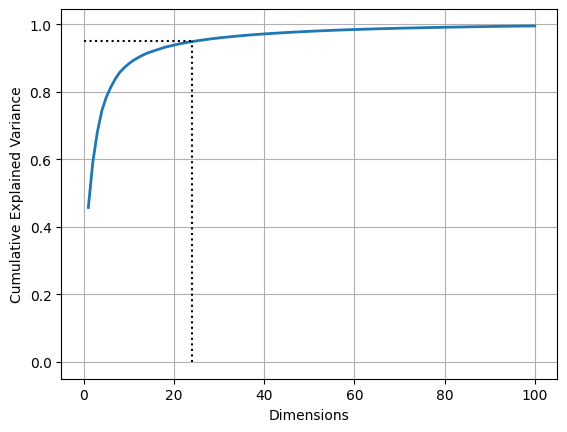

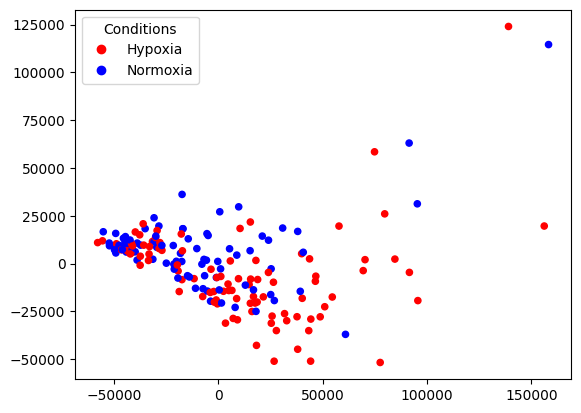

In [90]:
Blackbox(df_HCC_SS_tr,y_HCC_SS_tr, PCA())

PCA on HCC Dataset

The Explained Variance - Dimensions Plot gives us that 24 dimensions are sufficient to explain 95% of the variance in our data, a much greater result compared to the 3000 dimensions we were starting with.   
On the other hand, the plot in 2 Dimensions gives us points that are extremely mixed up: it doesn't seem to have a clear correlation with the labels.

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareF

The Opitmal Number of Dimensions for PCA is 18


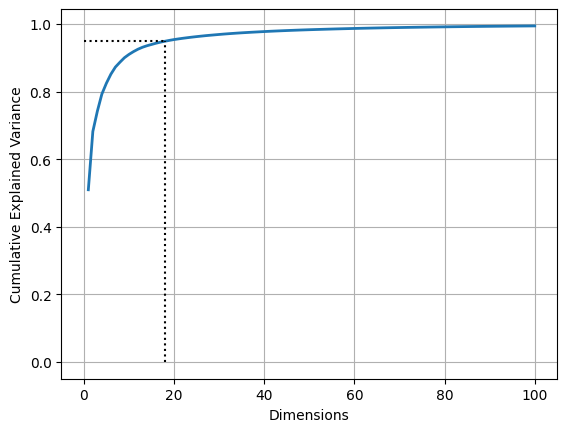

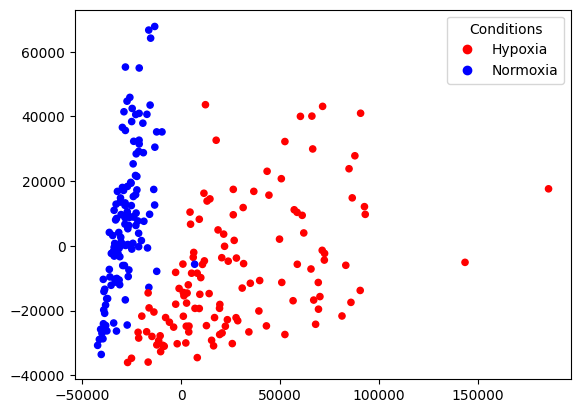

In [91]:
Blackbox(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

PCA on MCF Dataset

The Explained Variance - Dimensions Plot gives us an even better result: only 18 dimensions are necessary to explain 95% of the variance in our data!!!   
Moreover, compared to the previous dataset, the plot in 2 Dimensions gives us a great result: you can distinguish two main clusters of data, which would make clustering algorithm obtain good results on this result.

---
## t-SNE

`t-SNE`, which stands for t-Distributed Stochastic Neighbor Embedding,  is another method of Dimensionality Reduction, which is a nonlinear method based on the computation of a probability distribution which aims to keep similar points in the dataset close when getting in a lower dimensional space.   
It is mainly used for visualization of high dimensional data and cluster recognition.

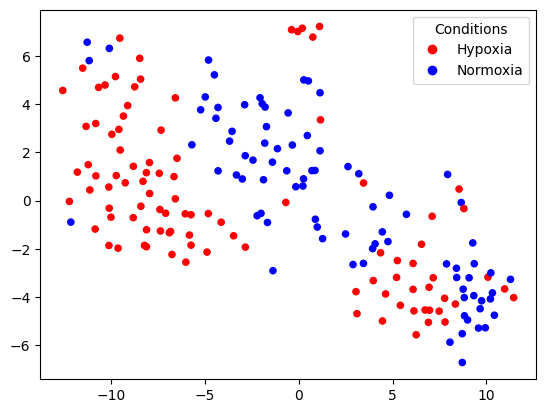

In [92]:
Plot(df_HCC_SS_tr,y_HCC_SS_tr,TSNE(random_state=69))

Due to the properties of the Dimensionality reduction method, it is impossible to plot a Variance-Dimensions plot, as the dimensionality reduction function TSNE( ) doesn't work after 4 dimensions.   
However, the visualization plot in 2 Dimensions already gives us a much better result compared to PCA on the HCC dataset: we can recognize in the plot two main pairs of clusters, but this is not necessarily good enough for a clustering algorithm to work well.

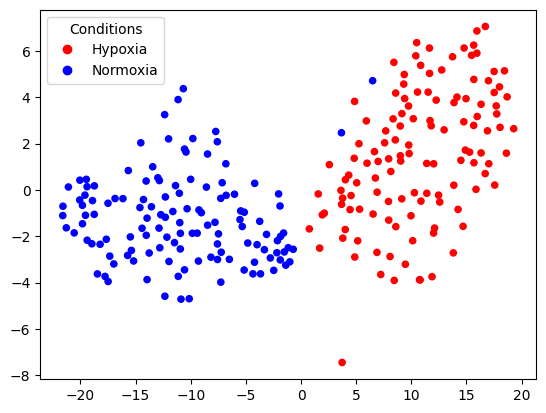

In [93]:
Plot(df_MCF_SS_tr,y_MCF_SS_tr,TSNE(random_state=69))

In the case of the MCF dataset, the result is much better! It clearly shows two main clusters, a blue one on the left of Normoxia cells and a red one on the right for Hypoxia cells. It looks like a clustering algorithm would work better on such a plot.

---
## UMAP

The last method of Dimensionality Reduction that we decided to apply is `UMAP`, or Uniform Manifold Approximation and Projection, which is based on the mathematical construct of manifolds: it finds first manifolds in the complex data and then represents them in the low-dimensional space.

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


The Opitmal Number of Dimensions for PCA is 100


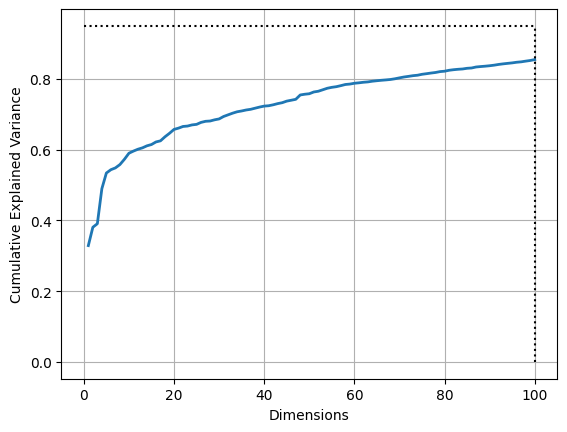

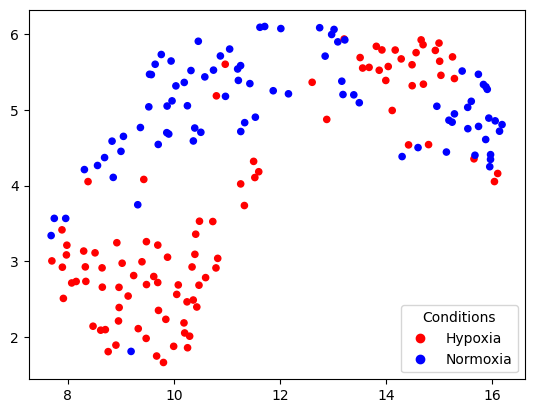

In [94]:
Blackbox(df_HCC_SS_tr, y_HCC_SS_tr, UMAP(random_state=69))

The Variance-Dimensions Plot for HCC gives us a much lower growth compared to the PCA case. This is to be expected, as the principle behind PCA is entirely that of maximizing the explained variance, while for UMAP we don't have a clear correlation between the two variables.   
On the other hand, the two dimensional scatterplot is very similar to that of TSNE, showing two main pairs of clusters.

The Opitmal Number of Dimensions for PCA is 100


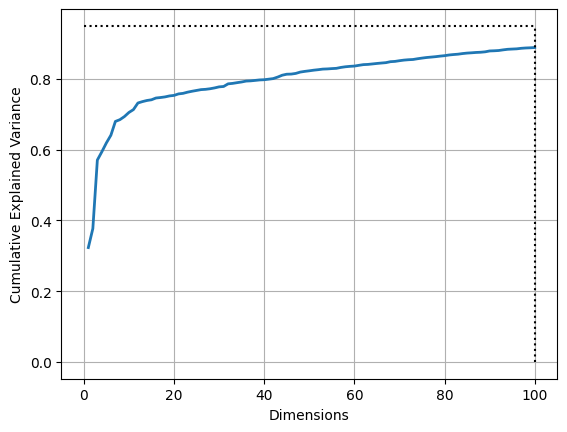

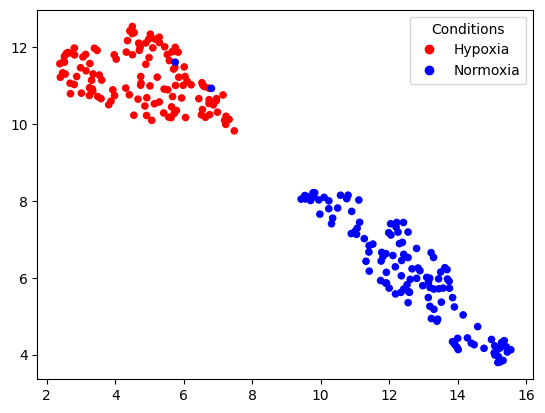

In [95]:
Blackbox(df_MCF_SS_tr,y_MCF_SS_tr,UMAP(random_state=69))

The result for the MCF dataset is similar to that of HCC, as the number of dimensions explaining 95% of the variance is still more than 100.   
What is extremely interesting about UMAP on MCF is the Two Dimensional Scatterplot: it shows two extremely clear clusters of Normoxia and Hypoxia cells.

Based on the previous results, the two methods that we consider to be the most relevant are PCA, which is the best in terms of explained variance per number of components, and UMAP, which is the one which looks like to be the most suited for clustering.

---
---
---
# Clustering

Clutering is a Machine Learning Technique that aims to identify patterns and relationships in dataframe, by grouping together "clusters" of data.

---
## Two Components Dimensionsionality Reduction

This brief code allows us to apply a generic Dimensionality Reduction Technique, contained in the variable `model`, to a generic dataframe, contained in `X`.

In [96]:
def Two_Comp_DR(X,model):
    model.set_params(n_components=2)
    m = model.fit(X)
    mnew = m.fit_transform(X)
    x_fit = pd.DataFrame(mnew, columns=["PC1","PC2"])
    return x_fit, m

---
---
## HCC

First of all we decided to run clustering on the HCC dataframe, in order to check whether the algorithm gives us a good classification model for recognizing Normoxia vs Hypoxia Cells.

---
## 2 Clusters HCC

Our first try was to apply a simple clustering to our dataframes in order to check whether the two clusters given by the clustering algorithm, in this case `KMeans`, would give us a result that resembles our Hypoxia/Normoxia classification.

In [97]:
def KM_Plot(X,model):
    X_Reduced, m = Two_Comp_DR(X, model)
    km = KMeans(n_clusters=2, random_state=69)
    km.fit(X_Reduced)
    labels = km.fit_predict(X_Reduced)
    Plot(X, labels, model)

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


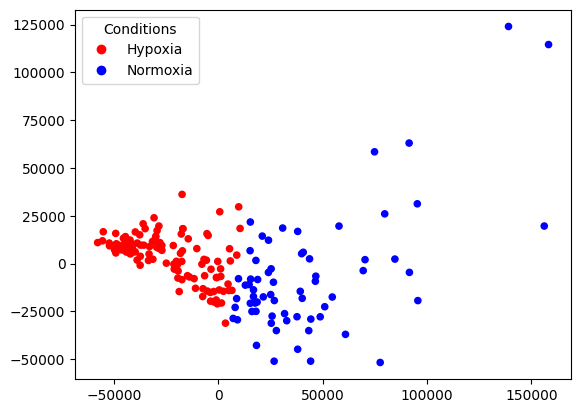

In [98]:
KM_Plot(df_HCC_SS_tr, PCA())

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


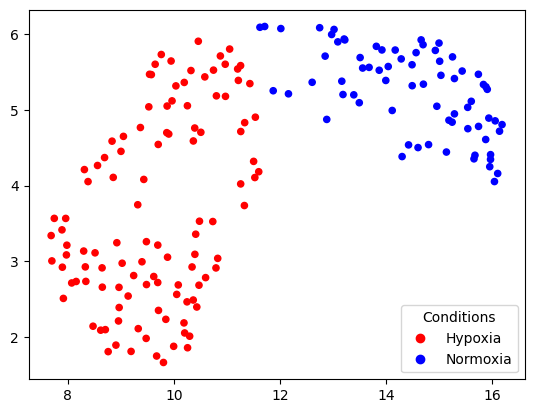

In [99]:
KM_Plot(df_HCC_SS_tr, UMAP(random_state=69))

Clearly in none of the three cases of Dimensionality Reduction, the results are satisfactory. As we could have expected, the clustering algorithm fails to recognize the nonlinear distinction in clusters in the original dataset, therefore we need to try with a different approach.

---
## KMeans on Full Dimensions

Our second idea was to apply the clustering algorithm to differentiate our dataset in a number of clusters larger than 2, and then post-process the labels of each cluster in order to assign to each cluster the label that is most frequent between the points of the cluster.

Once again the clustering algorithm that we decided to apply is `KMeans`, an algorithm which works as follows: it picks at random k centroids in the space of the data to which you apply the algorithm, and then assigns a label to each datapoint based on the closest centroid. It then shifts the centroid to the center of mass of the cluster, to then repeat the classification until convergence.

In [100]:
def OptimalN(X, Y):
    df = pd.DataFrame(columns=['Clusters', 'AMI'])
    for n in range(11,21):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        ami = adjusted_mutual_info_score(Y, labels)
        row = {'Clusters': n, 'AMI':ami}
        df = df.append(row, ignore_index=True)
    max_row = df.loc[df['AMI'].idxmax()]
    return int(max_row[0])

In [101]:
def Labels_Post_Process(n, Labels,Y):
    d={}
    for x in range(n):
        indices = [i for i in range(len(Labels)) if Labels[i] == x]
        corresp_y = [Y[i] for i in indices]
        expected = np.argmax(np.bincount(corresp_y))
        d[x] = expected

    for i in range(len(Labels)):
        Labels[i] = d[Labels[i]]
    return d, Labels

In [102]:
def KM_Clustering(X, Y, n):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        d, l = Labels_Post_Process(n, labels, Y)
        return d, l

In [103]:
def Ultra_KMeans(X,Y,model):
    Number = OptimalN(X,Y)
    print(Number)
    d, Labels = KM_Clustering(X, Y, Number)
    Plot(X,Labels,model)
    model1 = model.fit(X)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X)
    return model1, model2, d

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

13


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


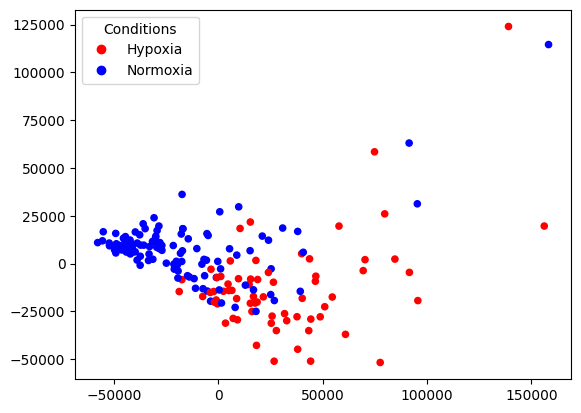

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
kmpca_hcc = Ultra_KMeans(df_HCC_SS_tr,y_HCC_SS_tr, PCA())

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

13


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


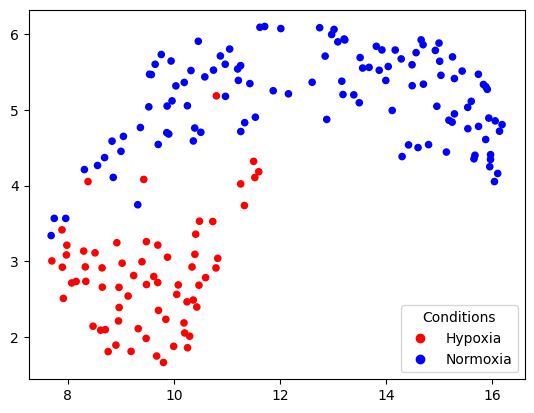

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
kmumap_hcc = Ultra_KMeans(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

The results obtained in this method are already much better compared to the previous attempt, but our concern was that applying the clustering to the full dimensions dataset wouldn't fully use the advantages of our dimensionality reduction technique, as the dimensionality reduction in this case is only used to visualize the result.

---
### Testing

In [106]:
def Test_1(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    labels = km.predict(X_test)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [107]:
Test_1(kmpca_hcc,df_HCC_SS_ts,y_HCC_SS_ts)

0.24444444444444444


We decided to test the correctness of our classification to a test dataset, and our classifier got the correct result in 75% of the given inputs.

---
## KMeans on Reduced Dimensions

Another method we decided to implement was to apply the same clustering as above, but on the Reduced Dimensions Dataset.

In [131]:
def Plot_2(X,Y):
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    plt.scatter(X["PC1"], X["PC2"], c=[colors[i] for i in Y], s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Assigned Labels")
    plt.show()

In [109]:
def KMR_Clustering(X,Y,model):
    X_R, model1 = Two_Comp_DR(X,model)
    Number = OptimalN(X_R,Y)
    print(Number)
    d, Labels = KM_Clustering(X_R, Y, Number)
    Plot_2(X_R, Labels)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X_R)
    return model1, model2, d

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

12


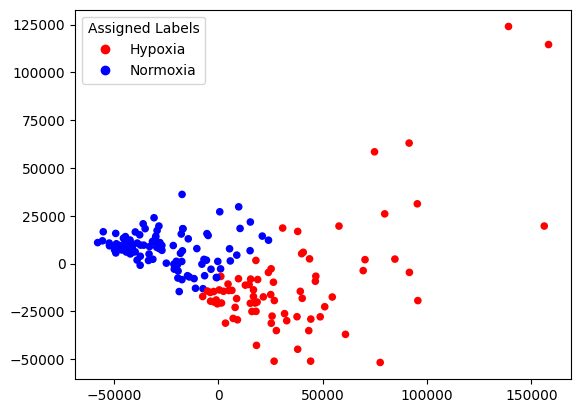

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
kmrpca = KMR_Clustering(df_HCC_SS_tr,y_HCC_SS_tr,PCA())

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

11


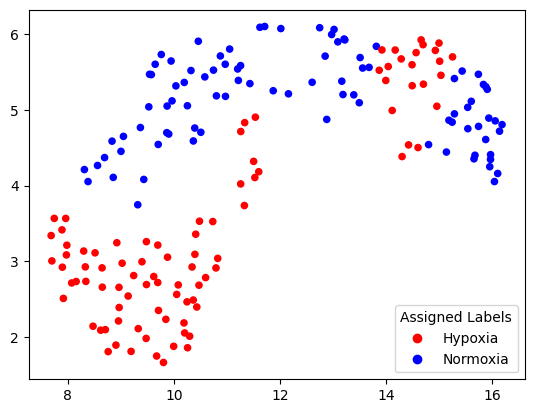

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [133]:
kmrumap = KMR_Clustering(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

The results on PCA are not so good, but the results on UMAP look very accurate, and the performance of this method are better than the previous as our clustering algorithm is applied to a 2-dimensional dataset instead of a 3000-dimensional one.

---
### Test

In [112]:
def Test_2(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    try:
        X_ts = models[0].transform(X_test)
    except AttributeError:
        X_ts = models[0].fit_transform(X_test)
    labels = km.predict(X_ts)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [113]:
Test_2(kmrpca, df_HCC_SS_ts, y_HCC_SS_ts)
#8      =>      0.36
#12     =>      0.4
#24     =>      0.53
#31     =>      0.47

0.4


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [114]:
Test_2(kmrumap, df_HCC_SS_ts, y_HCC_SS_ts)
#9      =>      0.2
#11     =>      0.18
#24     =>      0.24
#31     =>      0.22

0.17777777777777778


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


As before, we performed a couple of tests on the test dataset on different ranges of number of clusters, and it seems that the best result is obtained by applying KMeans on a dataset obtained with dimensionality reduction through UMAP with 11 post-processed clusters, which gives us the correct classifcation in 82% of instances of entries of the test set.

---
## DBSCAN

Another method of clustering we decided to apply is `DBSCAN`, short for Density Based Spatial Clustering of Applications with Noise. It works by grouping together points by defining a neighborhood of each point of radius epsilon and defining a cluster if the number of datapoints is at least min_samples.

In [115]:
def Optimal_Ms(X, Y):
    df = pd.DataFrame(columns=['MS', 'AMI'])
    for n in range(5,10):
        method=DBSCAN(min_samples=n, eps=30000)
        method.fit(X)
        labels = method.fit_predict(X)
        ami = adjusted_mutual_info_score(Y, labels)
        row = {'MS': n, 'AMI':ami}
        df = df.append(row, ignore_index=True)
    max_row = df.loc[df['AMI'].idxmax()]
    return int(max_row[0])

In [116]:
def DBS_Clustering(X, Y, n):
        method=DBSCAN(min_samples=n, eps=30000)
        method.fit(X)
        labels = method.fit_predict(X)
        return labels

In [117]:
def Ultra_DBSCAN(X,Y,model):
    Number = Optimal_Ms(X,Y)
    Labels = DBS_Clustering(X, Y, Number)
    Plot(X,Labels,model)

C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\T

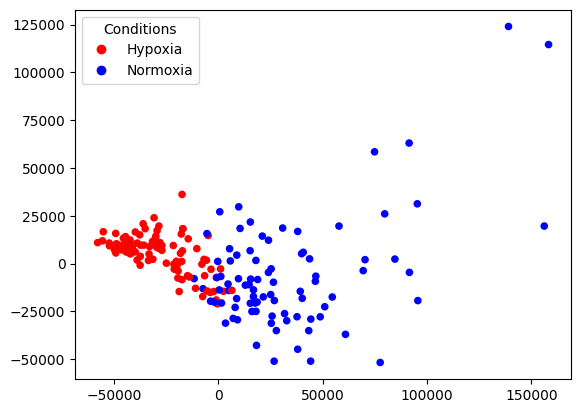

In [118]:
Ultra_DBSCAN(df_HCC_SS_tr,y_HCC_SS_tr,PCA())

C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\T

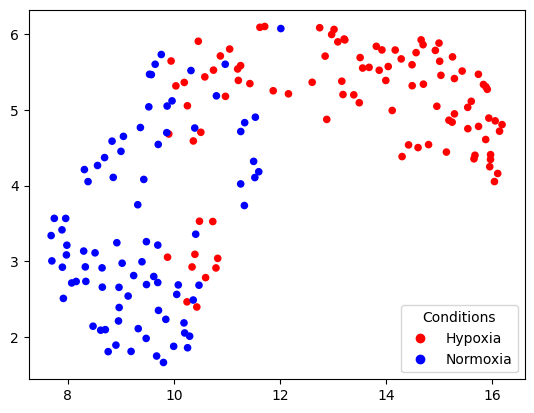

In [119]:
Ultra_DBSCAN(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

Unfortunately, the results obtained with DBSCAN is worse than those obtained with KMeans, and due to the way the algorithm works we have no hope of applying a post-processing procedure similar to that used with KMeans.

---
---
## MCF

---
## KMeans on Full Dimensions

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

17


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


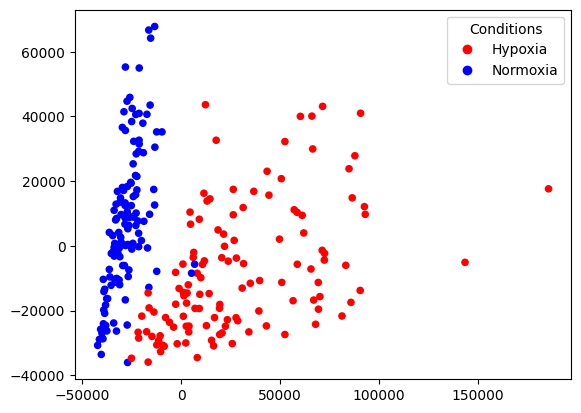

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [120]:
kmpca_mcf = Ultra_KMeans(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

17


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


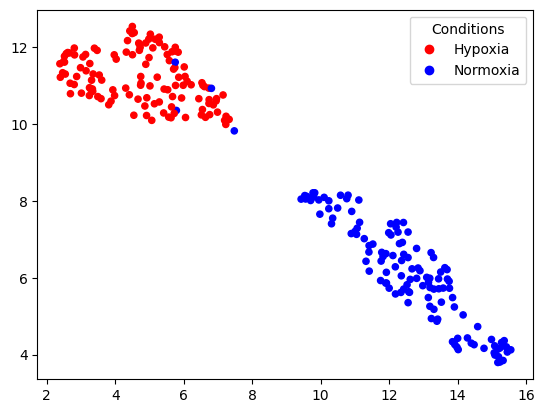

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [121]:
kmumap_mcf = Ultra_KMeans(df_MCF_SS_tr, y_MCF_SS_tr, UMAP(random_state=69))

As we expected from the way the plots with correct labels looked, clustering obtains really good results in terms of similarity between empirical labels and the correct ones.

In [122]:
Test_1(kmpca_mcf, df_MCF_SS_ts, y_MCF_SS_ts)

0.016129032258064516


Testing the classifier on the test set gives us correct predictions in 98.4% of the instances, an extremely good result.

---
## KMeans on Reduced Dimensions

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

12


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


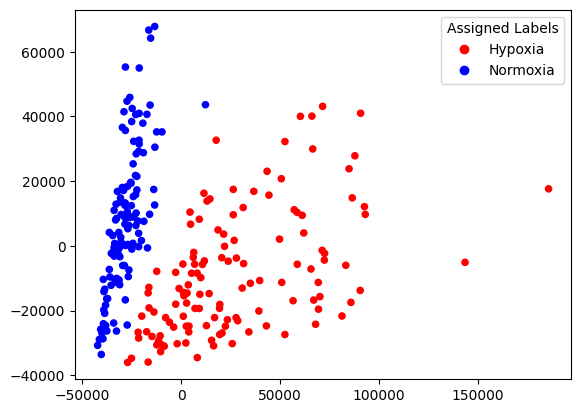

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [134]:
kmrpca_mcf = KMR_Clustering(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

11


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


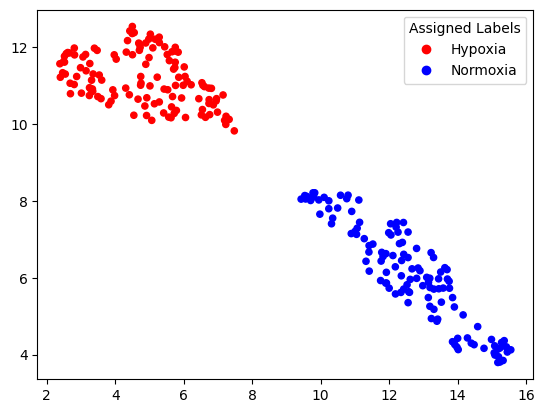

C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
kmrumap_mcf = KMR_Clustering(df_MCF_SS_tr,y_MCF_SS_tr,UMAP(random_state=69))

In [125]:
Test_2(kmrpca_mcf,df_MCF_SS_ts,y_MCF_SS_ts)

0.0


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [126]:
Test_2(kmrumap_mcf, df_MCF_SS_ts, y_MCF_SS_ts)

0.016129032258064516


C:\Users\Michele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Again, KMeans obtains extremely good results also on the reduced datasets, with classifiers with precision of 100% in the case of the PCA-Reduced Dataset and the same 98.4% on the UMAP-Reduced Dataset.

---
## DBSCAN

C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\T

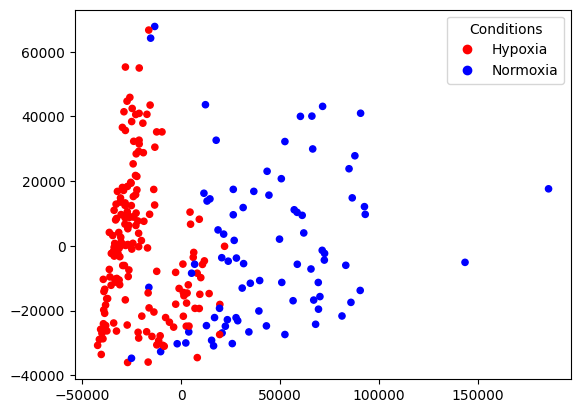

In [127]:
Ultra_DBSCAN(df_MCF_SS_tr, y_MCF_SS_tr, PCA())

C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\Temp\ipykernel_10436\795792575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Michele\AppData\Local\T

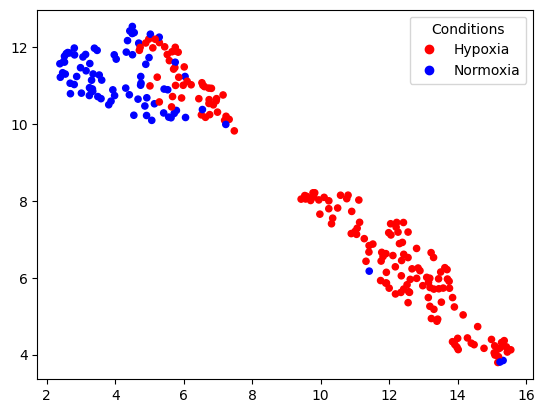

In [128]:
Ultra_DBSCAN(df_MCF_SS_tr, y_MCF_SS_tr, UMAP(random_state=69))

Applying DBSCAN on the MCF dataset gives us much worse results than what we expected, as even clusters which are clearly distinguished in the 2-Dimensional Plot get mixed up by the algorithm.